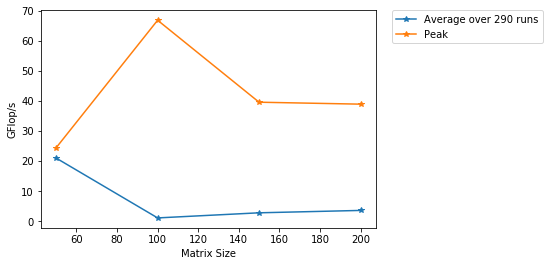

In [8]:
import timeit
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

def bench_mmm(startn,maxn,step,loops):
    count=0
    
    #Preallocate results lists
    avg_gflops = int((1+(maxn-startn)/step))*[0] 
    peak_gflops = int((1+(maxn-startn)/step))*[0]
    raw_times = [int(loops)*[0] for i in range(int(1+(maxn-startn)/step))]
    all_gflops = [int(loops)*[0] for i in  range(int(1+(maxn-startn)/step))]
    mat_size=int((1+(maxn-startn)/step))*[0] 

    for n in range(startn,maxn+step,step):
        setup_string = "from pylab import rand,dot;n=%d;a=rand(n,n);b=rand(n,n)" % n
        time_list = timeit.repeat("a.dot(b)", setup=setup_string, repeat=loops,number=1)
        raw_times[count] = time_list
        total_time = sum(time_list)
        avg_time = total_time / loops
        peak_time = min(time_list)
        num_ops = 2*n**3-n**2
        avg_gflops[count] = (num_ops/avg_time)/10**9
        peak_gflops[count] = (num_ops/peak_time)/10**9
        all_gflops[count] = [(num_ops/time)/10**9 for time in raw_times[count]]        
        mat_size[count] = n
        count=count+1
    
    plt.plot(mat_size,avg_gflops,'*-',label="Average over %d runs" %loops)
    plt.plot(mat_size,peak_gflops,'*-',label="Peak")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Matrix Size');
    plt.ylabel('GFlop/s');
    plt.show()
    
    return(max(peak_gflops),raw_times,all_gflops)

peak_flops = bench_mmm(50,200,50,290)

In [9]:
#CPU and host info. Most of this cell only works on Linux
import multiprocessing
!date
!uname -r
!test -d /etc/redhat-release && cat /etc/redhat-release !test -d /etc/debian_version && cat /etc/debian_version !test -d /etc/os-release && cat /etc/os-release
print('CPUS available = {0}'.format(multiprocessing.cpu_count()))
!hostname
!cat /proc/cpuinfo | grep 'model name' | uniq
!echo "OMP_NUM_THREADS=$OMP_NUM_THREADS"
print('Measured peak speed = {0} Gigaflops'.format(max(result1,result2)))

Mon Feb  3 18:17:53 UTC 2020
4.19.56-coreos-r1
CPUS available = 4
jupyter-laguer-2dgflop-2dbenchmark-2dml1xkifm
model name	: Intel Core Processor (Haswell, no TSX)
OMP_NUM_THREADS=


NameError: name 'result1' is not defined

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.real_if_close is deprecated and will be removed in SciPy 2.0.0, use numpy.real_if_close instead


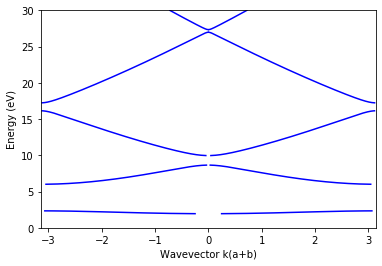

In [1]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

hbar = 1.05457*10**-34 
echarge = 1.602*10**-19
emass = 9.109*10**-31 

def bandfunc(a,b,energy,v0):
    #b is the width of the potential barriers and a is the distance between them
    #energy is the value of energy in ElectronVolts that we are solving for
    #v0 is the height of the potential barriers in ElectronVolts
    if(energy==v0):
        return(None)
    result = None
    energy = energy*echarge
    v0 = v0*echarge
    b = b*10**-10
    a = a*10**-10
    
    alpha = sqrt((2*emass/hbar**2)*energy)
    beta = sqrt(2*emass*(v0-energy)/hbar**2)
    AlphaBeta_term = (beta**2 - alpha**2) /(2*alpha*beta)
    trace = cos(alpha*a)*cosh(beta*b) + AlphaBeta_term*sin(alpha*a)*sinh(beta*b)
    if abs(trace) < 1:
        result = real_if_close(arccos(trace))
    return(result)
    

def plotband(v0 = 6,a = 2.5,b = 2.5):
    energy_array = linspace(0.1,30,5000)
    #Calulate the positive k values
    k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
    #The negative k-values are just a mirror image of the positive ones
    neg_k_vals = array([-k if k is not None else None for k in k_vals])
    #generate the plot
    plt.plot(k_vals,energy_array,'b');
    plt.plot(neg_k_vals,energy_array,'b');
    plt.axis([-pi,pi, 0,30])
    plt.xlabel('Wavevector k(a+b)')
    plt.ylabel('Energy (eV)')

plotband(6,2.5,2.5)

Alternatively, we can allow the students to interact with the model using sliders. No need for them to modify the code. Note that the calculations are being preformed in real time!

In [2]:
interact(plotband,
         v0=(0,10,0.1),
         a=(0,5,0.1),
         b=(0,5,0.1),
        );

interactive(children=(FloatSlider(value=6.0, description='v0', max=10.0), FloatSlider(value=2.5, description='…